# Solving the 1-D Schrodinger Equation
$$ i \hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2\psi}{\partial x^2} + V(x)\psi $$

## Discretization (after dimensional analysis)

$$ i \frac{d\phi}{dt} = H \phi $$

where

$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  


Formal solution:  

$$ \phi(t) = e^{-i H t} \phi(0) $$

Strategy:  
1. Solve for eigenvalues and eigenvectors of $H$  

$$ H \phi_n = \epsilon_n \phi_n $$  

2. Expand $\phi(0)$ in the basis of eigenvectors  

$$ \phi(0) = \sum_n c_n \phi_n $$  
where $c_n = \phi_n^{\dagger} \phi(0)$  

3. The state $\phi(t)$ is then given by  

\begin{eqnarray*}
\phi(t) &=& e^{-i H t} \phi(0) \\
&=& \sum_n c_n e^{-i\epsilon_n t}\phi_n
\end{eqnarray*}

## Example: Time evolution of Particle facing Step Potential 




In [1]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
import math
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [2]:
delta = 0.1
L = 25 
N = int(L / delta )
dimension = 2*N + 1 # Number of lattice points.
x = np.linspace(-L,L,2*N+1)
V0 = 2

###### potential parameters ##########
a = 1.0 ## width of each well
b = 5.0 ## half distance between wells

In [3]:
def kronecker(i,j):
    return 1 if i==j else 0

def V1(z):
    if z > -(b+a) and z < -b:
        return -V0
    else:
        return 0
    
def V2(z):
    if abs(z) > b and abs(z) < (a + b):
        return -V0
    else:
        return 0

def h1(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V1(delta*i) * kronecker(i,j)

def h2(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V2(delta*i) * kronecker(i,j)

In [4]:
H1 = np.array( [[h1(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H1_eigenvalues, H1_eigenvectors = lin.eig(H1)
idx1 = H1_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H1_eigenvalues = H1_eigenvalues[idx1] # Sorted eigenvalues
H1_eigenvectors = H1_eigenvectors[:,idx1] # Sorted eigenvectors

H2 = np.array( [[h2(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H2_eigenvalues, H2_eigenvectors = lin.eig(H2)
idx2 = H2_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H2_eigenvalues = H2_eigenvalues[idx2] # Sorted eigenvalues
H2_eigenvectors = H2_eigenvectors[:,idx2] # Sorted eigenvectors

In [5]:
Psi0 = H1_eigenvectors[:,0]

In [6]:
def Psi(t):
    sum = np.zeros(dimension, 'complex')
    for n in range(dimension):
        c = np.vdot(Psi0, H2_eigenvectors[:,n]) # nth expansion coefficient 
        E = H2_eigenvalues[n]
        sum += c * np.exp(-E*t*1.0j) * H2_eigenvectors[:,n]
    return sum

def Prob(t):
    return np.abs(Psi(t))**2

In [7]:
potential = np.array([V2(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

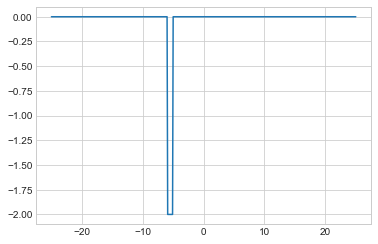

In [8]:
plt.plot(x,np.array([V1(delta*i) for i in range(-N,N+1)]))

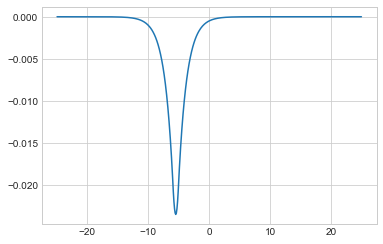

In [9]:
plt.plot(x, delta*Psi0)

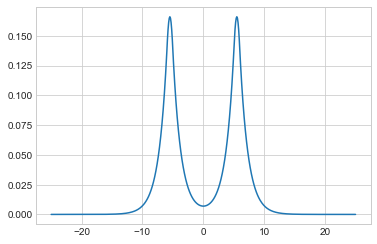

In [10]:
plt.plot(x,H2_eigenvectors[:,0])

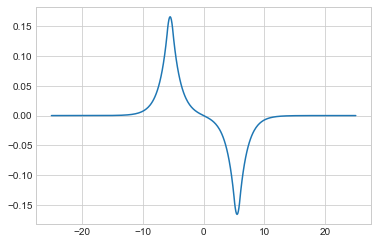

In [11]:
plt.plot(x,H2_eigenvectors[:,1])

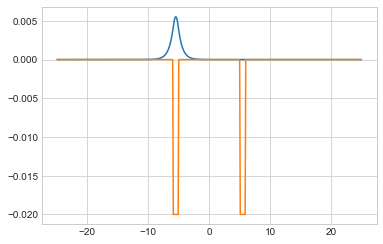

In [12]:
plt.plot(x, delta*Prob(0))
plt.plot(x, 0.01 * potential, label="Potential")

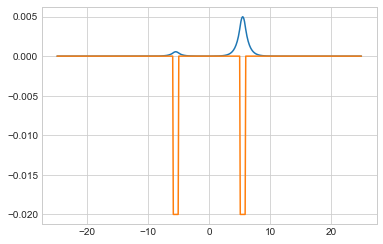

In [13]:
plt.plot(x, delta*Prob(100000.))
plt.plot(x, 0.01 * potential, label="Potential")

In [14]:
def V3(z):
    if z < (b+a) and z > b:
        return -V0
    else:
        return 0

def h3(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V3(delta*i) * kronecker(i,j)

H3 = np.array( [[h3(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H3_eigenvalues, H3_eigenvectors = lin.eig(H3)
idx3 = H3_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H3_eigenvalues = H3_eigenvalues[idx3] # Sorted eigenvalues
H3_eigenvectors = H3_eigenvectors[:,idx3] # Sorted eigenvectors

Psi2 = H3_eigenvectors[:,0]

def prob_2(t):
    return abs(np.vdot(Psi2, Psi(t))) ** 2

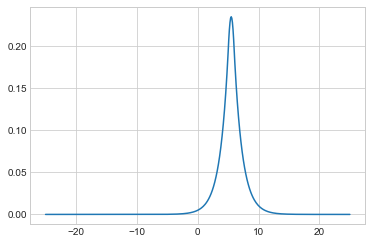

In [15]:
plt.plot(x,Psi2)

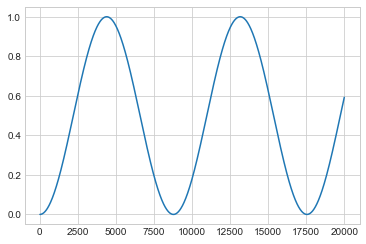

In [16]:
plt.plot(np.linspace(0,20000,1000), [prob_2(t) for t in np.linspace(0,20000,1000)])

In [18]:
times = np.linspace(7500,10000,1000)
overlap_probs = [prob_2(t) for t in times]
T_P = times[overlap_probs.index(min(overlap_probs))]
print("Time Period (dimensionless)", T_P)
print("Theoretical dimensionless Time Period", 2*np.pi/(H2_eigenvalues[1]-H2_eigenvalues[0]))

Time Period (dimensionless) 8773.773773773773
Theoretical dimensionless Time Period 8773.740282589017
